In [3]:
%matplotlib inline
import os, sys, pickle
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt2

In [64]:
import seaborn

/share/apps/matplotlib/1.5.0/intel/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [86]:
from sklearn import discriminant_analysis, feature_extraction, decomposition, manifold

In [5]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000


### Getting the data

In [5]:
!ls -a

.				    id_case_map.csv
..				    .ipynb_checkpoints
100CASELEVEL_Touse.dta		    judge_embeddings
auburn_appct_stata.dta		    process_data.ipynb
auburn_district_w_songer_codes.dta  testing-vectors.ipynb
case_by_judge.csv		    Untitled.ipynb
case_by_judge_imp_feats.csv	    V3CircuitJudgesBIO.dta
caselevel_touse.dta		    V3DistrictJudgesBIO.dta
docvec_index_id.txt		    vectors2.log
docvecs_0.txt			    vectors2.py
docvecs_1.txt			    vectors3.py
docvecs_2.txt			    vectors.log
docvecs.p			    vectors.py
get-judge-name-id-map.ipynb


In [6]:
docvecs = pickle.load(open('docvecs.p','rb'))

/home/sv1239/.local/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [7]:
model0 = docvecs[0]
model1 = docvecs[1]
model2 = docvecs[2]

In [8]:
n = model0.count
print n

675


In [9]:
X0, X1, X2 = [], [], []
for i in range(n):
    X0.append(model0[i])
    X1.append(model1[i])
    X2.append(model2[i])

In [10]:
X0 = np.array(X0)
X1 = np.array(X1)
X2 = np.array(X2)

In [11]:
print X0.shape
print X1.shape
print X2.shape

(675, 100)
(675, 100)
(675, 100)


In [12]:
model0.doctags

{}

#### Judge Bio data

In [13]:
v3c = pd.read_stata('/home/sv1239/projects/chen/V3CircuitJudgesBIO.dta')

In [14]:
v3d = pd.read_stata('/home/sv1239/projects/chen/V3DistrictJudgesBIO.dta')

In [15]:
aub_c = pd.read_stata('/home/sv1239/projects/chen/auburn_appct_stata.dta')
aub_d = pd.read_stata('/home/sv1239/projects/chen/auburn_district_w_songer_codes.dta')

In [16]:
v3c.head()

songername  circuit  start_date  senior_date  end_date  x_dem  \
0  ACHESON, MARCUS W.        3      -25168          NaN    -19552      0   
1     ADAMS, ARLIN M.        3        3562          NaN      9863      0   
2     AGEE, G. STEVEN        4       17714          NaN       NaN      0   
3   AINSWORTH, ROBERT        5        2394          NaN      8026      1   
4  ALARCON, ARTHUR L.        9        7245        12013       NaN      1   

   x_repub  x_insba  x_elev  x_unity  x_aba  x_crossa  x_pfed  x_pothfe  \
0        1        0       1        1    NaN         0       1         0   
1        1        1       0        0      1         0       0         0   
2        1        1       0        0      1         0       0       NaN   
3        0        1       1        1      1         0       1         0   
4        0        1       0        1      0         1       0         0   

   x_plprof  x_pscab  x_pcab  x_pusa  x_pssen  x_paag  x_psp  x_pslc  x_pssc  \
0         0        0       0       0        0       0      0       0       0   
1         1        0       0       0        0       0      0       0       0   
2         0      NaN     NaN       0        0     NaN    NaN       1       1   
3         0        0       0       0        0       0      0       0       0   
4         1        0       0       0        0       0      0       1       0   

   x_pshou  x_psg  x_psgo  x_psen  x_psat  x_ppriv  x_pmayor  x_plocct  \
0        0      0       0       0       0        1         0         0   
1        0      0       0       0       0        1         0         0   
2        1      0       0       0       0        1         0         0   
3        0      0       0       0       0        1         0         0   
4        0      0       0       0       1        0         0         0   

   x_phous  x_pgov  x_pda  x_pcc  x_pccoun  x_pausa  x_pasat  x_pag  x_pada  \
0        0       0      0      0         0        0      NaN      0       0   
1        0       0      0      0         0        0      NaN      0       0   
2        0       0      0      0         0        0      NaN      0       0   
3        0       0      0      0         0        0      NaN      0       0   
4        0       0      0      0         0        0      NaN      0       1   

   x_pgovt  x_llmsjd  x_prot  x_evang  x_mline  x_norel  x_cath  x_jew  \
0        1         0       1        0        1        0       0      0   
1        1         0       0        0        0        0       0      1   
2        1         1     NaN      NaN      NaN      NaN     NaN    NaN   
3        1         0       0        0        0        0       1      0   
4        1         0       0        0        0        0       1      0   

   x_black  x_nw  x_fem  x_jdpub  x_bapub  x_b10s  x_b20s  x_b30s  x_b40s  \
0        0     0      0      NaN        0       0       0       0       0   
1        0     0      0        0        1       0       1       0       0   
2        0     0      0        1        0       0       0       0       0   
3        0     0      0        0        0       1       0       0       0   
4        0     1      0        0        0       0       1       0       0   

   x_b50s  x_pbank  x_pmag  x_ageon40s  x_ageon50s  x_ageon60s  x_ageles40  \
0       0        0       0           0           0           1           0   
1       0        0       0           1           0           0           0   
2       1        0       0           0           1           0           0   
3       0        0       0           0           1           0           0   
4       0        0       0           0           1           0           0   

   x_agemor70  x_pago retirementfromactiveservice  start_year  senior_year  \
0           0       0                                    1891          NaN   
1           0       0                                    1969          NaN   
2           0       0                                    2008          NaN   
3           0

In [17]:
v3d.head()

songername district  Courthouse  start_date  senior_date  \
0             ABRAMS, RONNIE     0208                   19075          NaN   
1        ABRUZZO, MATTHEW J.     0207    Brooklyn       -8721         2237   
2         ACHESON, MARCUS W.     0315  Pittsburgh      -29206          NaN   
3  ACKER, WILLIAM MARSH, JR.     1126  Birmingham        8265        13300   
4    ACKERMAN, HAROLD ARNOLD     0312      NEWARK        7245        12464   

   end_date  x_dem  x_repub  x_insba  x_elev  x_unity  x_aba  x_crossa  \
0       NaN      1        0        1     NaN        0      0       NaN   
1      4165      1        0        0     NaN        1      0         0   
2    -25162      0        1        0     NaN        0      0         0   
3       NaN      0        1        1     NaN        0      0         0   
4     18233      1        0        0     NaN        1      1         0   

   x_pfed  x_pothfe  x_plprof  x_pscab  x_pcab  x_pusa  x_pssen  x_paag  \
0     NaN       NaN         0      NaN     NaN       0        0     NaN   
1     NaN         1         0      NaN     NaN       0        0     NaN   
2     NaN       NaN         0        0       0       0        0       0   
3     NaN       NaN         0      NaN     NaN       0        0     NaN   
4     NaN       NaN         0      NaN     NaN       0        0     NaN   

   x_psp  x_pslc  x_pssc  x_pshou  x_psg  x_psgo  x_psen  x_psat  x_ppriv  \
0    NaN       0       0        0      0       0       0       0        1   
1    NaN       0       0        0      0       0       0       0        1   
2      0       0       0        0      0       0       0       0        1   
3    NaN       0       0        0      0       0       0       0        1   
4    NaN       1       0        0      0       0       0       0        1   

   x_pmayor  x_plocct  x_phous  x_pgov  x_pda  x_pcc  x_pccoun  x_pausa  \
0         0         0        0       0      0      0         0        1   
1         0         0        0       0      0      0         0        0   
2         0         0        0       0      0      0         0        0   
3         0         0        0       0      0      0         0        0   
4         0         0        0       0      0      0         0        0   

   x_pasat  x_pag  x_pada  x_pgovt  x_llmsjd  x_prot  x_evang  x_mline  \
0      NaN      0       0        1         0     NaN      NaN      NaN   
1      NaN      0       0        0         0       0        0        0   
2      NaN      0       0        0         0       1        0        1   
3      NaN      0       0        1         0       1        0        1   
4      NaN      0       0        1         0       0        0        0   

   x_norel  x_cath  x_jew  x_black  x_nw  x_fem  x_jdpub  x_bapub  x_b10s  \
0      NaN     NaN    NaN        0     0      1        0        0       0   
1        0       1      0        0     0      0        0        0       0   
2        0       0      0        0     0      0      NaN        0       0   
3        0       0      0        0     0      0        0        0       0   
4        0       0      1        0     0      0        1        0       0   

   x_b20s  x_b30s  x_b40s  x_b50s  x_pbank  x_pmag  x_ageon40s  x_ageon50s  \
0       0       0       0       0        0       0           1           0   
1       0       0       0       0        0       0           1           0   
2       0       0       0       0        0       0           0           1   
3       1       0       0       0        0       0           0           1   
4       1       0       0       0        0       0           0           1   

   x_ageon60s  x_ageles40  x_agemor70  x_pago retirementfromactiveservice  \
0           0           0           0       0                               
1           0           0           0       0                  02/15/1966   
2           0           0           0       0                               
3           0           0           0       0         

In [18]:
['gender','race','party','city','state','pres','religion']

['gender', 'race', 'party', 'city', 'state', 'pres', 'religion']

In [19]:
aub_c.head()

pname  id  pres  mona  yeara  monl  yearl  yearb  yeard  \
0    McKennan, William   5     4     1   1891     6   1906   1828   1906   
1   Kalodner, Harry E.  35    19    11   1969     1   1987   1921   9999   
2  Thayer, Amos Madden  45     8     5   1905    10   1916   1842   1916   
3             New Seat  75    18     8   1966    12   1981   1910   1981   
4             New Seat  90    21    11   1979    11   1992   1925   9999   

   pleft  left  party  state  city  circuit  elevate  gender  race  \
0      8     1      0     38  3870        3        1       1     1   
1     22     3      0     38  3860        3       25       1     1   
2     10     1      1     25  2580        8        6       1     1   
3     22     1      1     18  1860        5       18       1     1   
4     23     3      0      5   550        9       25       1     3   

                 name  appres  pleftsum  boom  crossa  crossl  mrespty  \
0  Acheson, Marcus W.       0         0     1       0       0        0   
1     Adams, Arlin M.       0         0     0       0       0        0   
2     Adams, Elmer B.       0         1     1       1       0        0   
3   Ainsworth, Robert       1         0     1       0       1      NaN   
4  Alarcon, Arthur L.       1         0     0       1       0      NaN   

   prespty  dummy  ids  religion   csb   ba  bast  bapp   ls  lsst  jdpp  \
0      NaN      1  NaN         7  3891  124     1     1  125     3     3   
1      NaN      1  301         5  3860   85     0     0   68     0     1   
2      NaN      1  NaN         7  4555   99     1     1   39     1     1   
3        1      1  501         4  2440  148     0     1  148     0     1   
4        1      1  901         4   550   77     0     1   77     0     1   

   graddeg1  graddeg2  graddeg3  pfedjdge  pfjdget  pssc  pslc  plocct  \
0         0         0         0         1       11     0     0       0   
1         2         0         0         0        0     0     0       0   
2         0         0         0         1       10     0     1       0   
3         0         0         0         1        5     0     0       0   
4         0         0         0         0        0     0     1       1   

   poutsjge  psjdget  pausa  pusa  psgo  psg  pago  paag  pag  pcc  psp  \
0         0        0      0     0     0    0     0     0    0    0    0   
1         0        0      0     0     0    0     0     0    0    0    0   
2         0        5      0     0     0    0     0     0    0    0    0   
3         0        0      0     0     0    0     0     0    0    0    0   
4         0       15      0     0     0    0     0     0    0    0    0   

   pspros  pmag  pbj  pcab  pcabdept  pscab  pscabdpt  pindreg1  preg1  \
0       0     0    0     0         0      0         0         0      0   
1       0     0    0     0         0      0         0         0      0   
2       0     0    0     0         0      0         0         0      0   
3       0     0    0     0         0      0         0         0      0   
4       1     0    0     0         0      0         0         0      0   

   pindreg2  preg2  pindreg3  preg3  pindreg4  preg4  pindreg5  preg5  phouse  \
0         0      0         0      0         0      0         0      0       0   
1         0      0         0      0         0      0         0      0       0   
2         0      0         0      0         0      0         0      0       0   
3         0      0         0      0         0      0         0      0       0   
4         0      0         0      0         0      0         0      0       0   

   psenate  pgov  pssenate  pshouse  pmayor  pccoun  pccom  pda  plother  \
0        0     0         0        0       0       0      0    0        0   
1        0     0         0        0       0       0      0    0        0   
2        0     0         0        0       0       0      0    0        0   
3        0     0         0        0       0       0      0    0        0   
4        0     0         0   

In [20]:
aub_d.head()

name_original                       name  songer_code  \
0        Abruzzo, Matthew J.        Abruzzo, Matthew J.        10201   
1     Acheson, Marcus Wilson     Acheson, Marcus Wilson          NaN   
2  Acker, William Marsh, Jr.  Acker, William Marsh, Jr.        11101   
3    Ackerman, Harold Arnold    Ackerman, Harold Arnold        10301   
4      Ackerman, James Waldo      Ackerman, James Waldo        10701   

   circuit_original  circuit  id  pres  monl  yearl  yearb  yeard  pleft  \
0                 2        2   2    14     2   1966   1889   1971     18   
1                 3        3   4     1     2   1891   1828   1906      4   
2                11       11  10    22     5   1996   1927   9999     92   
3                 3        3  15    21     2   1994   1928   9999     92   
4                 7        7  20    20    11   1984   1926   1984     22   

   left  party  district  state  city  gender  race  amon  ayear  crossl  \
0     3      1         4     32  3220       1     1     2   1936       0   
1     4      0         5     38  3870       1     1     1   1880       0   
2     3      0         3      1   110       1     1     8   1982       1   
3     3      1         0     30  3080       1     1    10   1979       0   
4     1      0         2     13  1370       1     1     7   1976       0   

   crossa  ___l  ___j ___char  elevate   pred  dcother  recess  appt  temp  \
0       0   NaN   NaN              NaN      0      NaN       0     1   NaN   
1       0   NaN   NaN              NaN   6544      NaN       0     0     0   
2       0   NaN   NaN              NaN   8810      NaN       0     0     0   
3       0   NaN   NaN              NaN    435      NaN       0     0     0   
4       0   NaN   NaN              NaN  21000      NaN       0     0     0   

   trans   assets  liable  aba  abamin  dsenate  rsenate  dhouse  rhouse  \
0      0      NaN     NaN    6     NaN       69       25     322     103   
1      0      NaN     NaN    8     NaN       43       33     150     128   
2      0  1075000     NaN    3     NaN       46       53     243     192   
3      0   190737     NaN    2     NaN       58       41     277     158   
4      1        0     NaN    2     NaN       61       37     291     144   

   fhouse  fsenate  drhouse  drsenate  whouse  wsenate  nrhouse  nrsenate  \
0       0        0        0         0       0        0        0         0   
1       0        0        0         0       0        0        0         0   
2       0        0        0         0       0        0        0         0   
3       0        0        0         0       0        0        0         0   
4       0        0        0         0       0        0        0         0   

   dsens  rsens  dummy       seatno      pseatno      sseatno      seatno2  \
0      2      0      1  NY.ED.06.01            1  NY.ED.06.02                
1      1      1      1  PA.WD.01.06  PA.WD.01.05  PA.WD.01.07                
2      1      1      1  AL.ND.03.04  AL.ND.03.03                             
3      2      0      1  NJ.ST.04.05  NJ.ST.04.04  NJ.ST.04.05                
4      1      1      1  IL.SD.03.04  IL.SD.03.03            3  IL.CD.03.01   

  pseatno2     sseatno2 seatno3 pseatno3 sseatno3 seatno4 pseatno4 sseatno4  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4        2  IL.CD.03.02                                                       

  seatno5 pseatno5 sseatno5  tperm  multiple  amon2  ayear2  monl2  yearl2  \
0                              NaN       NaN    NaN     NaN    NaN     NaN   
1                              NaN       NaN    NaN     NaN    NaN     NaN   
2                              NaN       NaN    NaN     NaN    NaN     NaN   
3                      

In [21]:
print(v3c.shape)
print(v3d.shape)
print(aub_c.shape)
print(aub_d.shape)

(744, 71)
(2822, 71)
(677, 268)
(2558, 285)


In [22]:
len(aub_c[aub_c.pname=='New Seat'])

237

In [23]:
aub_c[aub_c.pname=='New Seat']

pname     id  pres  mona  yeara  monl  yearl  yearb  yeard  pleft  \
3    New Seat     75    18     8   1966    12   1981   1910   1981     22   
4    New Seat     90    21    11   1979    11   1992   1925   9999     23   
11   New Seat    175     6     4   1893    12   1904   1826   1906      8   
12   New Seat  30156    92     2   2000    99   9999   1949   9999     99   
16   New Seat    230    21     7   1979    99   9999   1936   9999     99   
18   New Seat    245    22    10   1985     1   2000   1932   9999     92   
19   New Seat    265    14     3   1939     1   1941   1887   1941     14   
20   New Seat    285     9     1   1911     1   1913   1848   1926      9   
22   New Seat    300    21     2   1980     4   2001   1936   9999     93   
30   New Seat  30157    92     9   1999    99   9999   1937   9999     99   
31   New Seat    477    29     2   1801     7   1802   1745   1815     30   
37   New Seat    530    15    11   1949     6   1979   1909   1993     21   
42   New Seat    620    17    10   1961     3   1976   1918   9999     20   
43   New Seat    625    17     9   1961     3   1967   1906   1967     18   
45   New Seat    657    29     2   1801     7   1802   1746   1833     30   
47   New Seat  30158    92     3   2000    99   9999   1945   9999     99   
49   New Seat    685    14     2   1937    10   1965   1895   1979     18   
55   New Seat    785    22     3   1986    99   9999   1944   9999     99   
56   New Seat    802    27     7   1870    10   1893   1828   1893      6   
59   New Seat    835    12     3   1925    12   1931   1861   1944     13   
64   New Seat    873    29     2   1801     7   1802   1755   1808     30   
70   New Seat   1000    21    12   1980     8   1994   1938   9999     92   
72   New Seat  30159    92     5   1995    99   9999   1947   9999     99   
73   New Seat   1060    19    12   1969    12   1971   1905   1971     19   
79   New Seat   1160    17     8   1961     5   1972   1899   1984     19   
86   New Seat  30160    92     2   2000    99   9999   1937   9999     99   
93   New Seat   1440    21     5   1980     5   1996   1931   9999     92   
95   New Seat   1470     9     1   1911    11   1922   1853   1922     11   
97   New Seat   1510    19     6   1969     4   1970   1919   1992     19   
102  New Seat   1590    16     5   1954    12   1976   1906   1994     20   
104  New Seat   1610    12     1   1929     9   1954   1889   1969     16   
109  New Seat   1720    14     3   1939    12   1963   1889   1963     18   
110  New Seat   1735    21    11   1979     8   1991   1920   9999     23   
112  New Seat  30161    92     7   1997    99   9999   1948   9999     99   
113  New Seat   1768    29     2   1801     7   1802   1764   1811     30   
114  New Seat   1775    18    11   1967     7   1969   1909   1969     19   
119  New Seat  30162    92    12   1995    99   9999   1951   9999     99   
130  New Seat   2115     8     5   1902     8   1917   1847   1923     10   
131  New Seat   2137    29     3   1801     2   1806   1769   1855     30   
133  New Seat   2150    18     7   1966     5   1977   1918   1977     21   
134  New Seat   2185    21     9   1979     8   1994   1926   9999     92   
135  New Seat   2195    18     8   1966     4   1999   1916   1999     92   
137  New Seat   2235     4     3   1892     5   1909   1839   1917      9   
139  New Seat  23160    92    11   1993    99   9999   1942   9999     99   
142  New Seat   2375     7     2   1899     2   1903   1849   1923      8   
146  New Seat  30163    92     9   1995    99   9999   1936   9999     99   
148  New Seat   2492    27    12   1869     9   1879   1831   1914      1   
153  New Seat   2612    27    12   1869     7   1884   1809   1890      3   
164  New Seat   2720    22     4   1985    99   9999   1948   9999     99   
171  New Seat   2829    27     1   1870     5   1877   1815   1877      1   
173  New Seat   2865    21     5   1980     9   1999   1926   1999     92   
176 

In [ ]:
newseats = aub_c[aub_c.pname=='New Seat'].id

#### Mapping for case-judges:

In [6]:
id_case_map = pd.read_csv('./id_case_map.csv',index_col=0)

In [7]:
id_case_map.reset_index(level=0,drop=True,inplace=True)

In [8]:
id_case_map.shape

(387898, 2)

In [9]:
id_case_map.head()

caseid  judgeidentificationnumber
0  X47NA7                        722
1  X47NA9                        965
2  X47NAA                       2320
3  X47NAC                        603
4  X47NAD                       1478

In [10]:
case_judges = list(set(id_case_map.ix[:,1].values))

In [11]:
print "Unique judges = ",len(set(id_case_map.ix[:,1].values))

Unique judges =  1181


In [32]:
c_judges = []
for j in case_judges:
    if pd.notnull(j):
        c_judges.append(j)
c_judges = map(int,list(set(c_judges)))

In [34]:
print "Actual primary judges (without nans) = ",len(c_judges)

Actual primary judges (without nans) =  736


In [42]:
aub_judges = list(aub_c.id.values) + list(aub_d.id.values)

In [43]:
len(set(aub_judges))

3235

In [44]:
#check if any nans/nulls in auburn judges
for i in aub_judges:
    if pd.isnull(i):
        print i

In [54]:
len(set.intersection(set(aub_judges), set(c_judges)))

170

In [72]:
#duplicate judges in aub_c
len(map(lambda x: x.lower(), aub_c.name.values)) - len(set(map(lambda x: x.lower(), aub_c.name.values)))

5

In [73]:
#duplicate judges in aub_d
len(map(lambda x: x.lower(), aub_d.name.values)) - len(set(map(lambda x: x.lower(), aub_d.name.values)))

6

In [76]:
sorted(map(lambda x: x.lower(), v3c.songername.values))

['acheson, marcus w.',
 'adams, arlin m.',
 'agee, g. steven',
 'ainsworth, robert',
 'alarcon, arthur l.',
 'aldisert, ruggero',
 'aldrich, bailey',
 'alito, samuel a., jr.',
 'allen, florence',
 'almond, james lindsay, jr.',
 'alschuler, samuel',
 'altimari, frank x.',
 'alvey, richard',
 'ambro, thomas l.',
 'anderson, albert b.',
 'anderson, george w.',
 'anderson, j. blaine',
 'anderson, r. lanier, iii',
 'anderson, r. lanier, iii',
 'anderson, robert p.',
 'anderson, stephen h.',
 'arant, herschel',
 'archer, glenn leroy, jr.',
 'arnold, morris s.',
 'arnold, richard s.',
 'arnold, thurman',
 'bacharach, robert',
 'baldock, bobby r.',
 'baldwin, phillip benjamin',
 'barkett, rosemary',
 'barksdale, rhesa h.',
 'barnes, stanley',
 'barrett, james e.',
 'barry, maryanne trump',
 'bassett, richard',
 'bastian, walter m.',
 'batchelder, alice m.',
 'batts, robert',
 'bauer, william j.',
 'baxter, john',
 'bazelon, david',
 'bea, carlos t.',
 'beam, clarence arlen',
 'becker, edward r

#### Mapping for docvec-index to judge_id

In [1]:
!ls

100CASELEVEL_Touse.dta		    judge_embeddings
auburn_appct_stata.dta		    process_data.ipynb
auburn_district_w_songer_codes.dta  testing-vectors.ipynb
case_by_judge.csv		    Untitled.ipynb
caselevel_touse.dta		    V3CircuitJudgesBIO.dta
docvec_index_id.txt		    V3DistrictJudgesBIO.dta
docvecs_0.txt			    vectors2.log
docvecs_1.txt			    vectors2.py
docvecs_2.txt			    vectors3.py
docvecs.p			    vectors.log
get-judge-name-id-map.ipynb	    vectors.py
id_case_map.csv


In [24]:
docvec_index_id = pd.read_csv('./docvec_index_id.txt',header=None)
docvec_index_id.columns = ['index','judge_id']

In [25]:
docvec_index_id.head()

index  judge_id
0      0      2861
1      1      3248
2      2       552
3      3      1184
4      4      2416

In [26]:
docvec_index_id_dict = dict(docvec_index_id.values)

In [27]:
docvec_id_index_dict = {}
for k,v in docvec_index_id_dict.items():
    docvec_id_index_dict[v] = k

In [28]:
docvec_index_id_dict

{0: 2861,
 1: 3248,
 2: 552,
 3: 1184,
 4: 2416,
 5: 791,
 6: 2703,
 7: 1173,
 8: 2308,
 9: 81,
 10: 1119,
 11: 1879,
 12: 146,
 13: 1077,
 14: 1644,
 15: 2366,
 16: 313,
 17: 2328,
 18: 2105,
 19: 652,
 20: 747,
 21: 1501,
 22: 1699,
 23: 475,
 24: 805,
 25: 16,
 26: 944,
 27: 2937,
 28: 874,
 29: 2057,
 30: 2045,
 31: 2069,
 32: 1604,
 33: 2574,
 34: 1236,
 35: 3174,
 36: 2234,
 37: 2300,
 38: 958,
 39: 1954,
 40: 1156,
 41: 2275,
 42: 176,
 43: 2758,
 44: 3233,
 45: 2052,
 46: 145,
 47: 184,
 48: 2960,
 49: 224,
 50: 218,
 51: 2213,
 52: 86,
 53: 1577,
 54: 411,
 55: 208,
 56: 1746,
 57: 2577,
 58: 1356,
 59: 1510,
 60: 2497,
 61: 656,
 62: 1804,
 63: 1626,
 64: 1555,
 65: 2031,
 66: 1705,
 67: 251,
 68: 1541,
 69: 2119,
 70: 855,
 71: 742,
 72: 1861,
 73: 1047,
 74: 1466,
 75: 263,
 76: 2621,
 77: 1756,
 78: 2094,
 79: 1584,
 80: 1885,
 81: 249,
 82: 2980,
 83: 106,
 84: 2083,
 85: 2147,
 86: 2531,
 87: 1492,
 88: 2116,
 89: 359,
 90: 2170,
 91: 1952,
 92: 931,
 93: 1654,
 94: 282,

In [29]:
!head -n 10 case_by_judge.csv

caseid,songername,jOrigname,judgeidentificationnumber
X101L14003,"MOTZ, DIANA GRIBBON",MOTZ,1705.0
X10284I003,"WILKINSON, J. HARVIE, III",WILKINSON,2587.0
X102UPO003,"SLOVITER, DOLORES K.",SLOVITER,2208.0
X103660N,"HUG, PROCTER R., JR.",HUG,1112.0
X1036DGN,"SCIRICA, ANTHONY J.",SCIRICA,2128.0
X1036JGN,"KING, CAROLYN DINEEN",KING,1963.0
X1036KON,"SEITZ, COLLINS J.",SEITZ,2139.0
X1036L8N,"HUFSTEDLER, SHIRLEY",HUFSTEDLER,1111.0
X1036OON,"SNEED, JOSEPH T.",SNEED,2234.0


In [12]:
case_by_judge = pd.read_csv("case_by_judge_imp_feats.csv")

In [13]:
case_by_judge.head()

caseid                 songername  jOrigname judgefirstname  \
0  X101L14003        MOTZ, DIANA GRIBBON       MOTZ          DIANA   
1  X10284I003  WILKINSON, J. HARVIE, III  WILKINSON          JAMES   
2  X102UPO003       SLOVITER, DOLORES K.   SLOVITER        DOLORES   
3    X103660N       HUG, PROCTER R., JR.        HUG        PROCTER   
4    X1036DGN        SCIRICA, ANTHONY J.    SCIRICA        ANTHONY   

  judgemiddlename judgelastname  judgeidentificationnumber     Author  \
0    JANE GRIBBON          MOTZ                       1705       MOTZ   
1          HARVIE     WILKINSON                       2587  WILKINSON   
2          KORMAN      SLOVITER                       2208    RENDELL   
3           RALPH           HUG                       1112        NaN   
4          JOSEPH       SCIRICA                       2128        NaN   

  AppointmentDate1  Circuitjudge1  birthyear State placeofbirthstate  \
0       1994-06-16              4       1943    MD                DC   
1       1984-08-13              4       1944    VA                NY   
2       1979-06-21              3       1932    PA                PA   
3       1977-09-15              9       1931    NV                NV   
4       1984-09-18              3       1940    PA                PA   

        presidentname genderNew raceorethnicity partyaffiliationofpresident  \
0  William J. Clinton         F           White                  Democratic   
1       Ronald Reagan         M           White                  Republican   
2        Jimmy Carter         F           White                  Democratic   
3        Jimmy Carter         M           White                  Democratic   
4       Ronald Reagan         M           White                  Republican   

                nameofschool1 degree1                          nameofschool2  \
0              Vassar College    B.A.   University of Virginia School of Law   
1             Yale University    B.A.   University of Virginia School of Law   
2           Temple University    A.B.  University of Pennsylvania Law School   
3  University of Nevada, Reno    B.S.                    Stanford Law School   
4         Wesleyan University    B.A.      University of Michigan Law School   

  degree2  party  StateOfResidence SchoolState1  Public1  Private1  \
0    J.D.      1                20           NY        0         1   
1    J.D.      0                46           CT        0         1   
2   LL.B.      1                38           PA        1         0   
3   LL.B.      1                28           NV        1         0   
4    J.D.      0                38           CT        0         1   

  SchoolState2  Public2  Private2  x_ageon40orless  x_ageon40s  x_ageon50s  \
0           VA        1         0                0           0           1   
1           VA        1         0                0           1           0   
2           PA        0         1                0           1           0   
3           CA        0         1                0           1           0   
4           MI        1         0                0           1           0   

   x_ageon60s  x_ageon70ormore   startdate  experience  
0           0                0  1994-06-16          10  
1           0                0  1984-08-13          20  
2           0                0  1979-06-21          25  
3           0                0  1977-09-15          17  
4           0                0  1987-08-06          14

In [47]:
case_by_judge[case_by_judge.jOrigname=='COWEN']

caseid            songername jOrigname  \
940       X12BKH0003                   NaN     COWEN   
27165       X1CIT2GN  COWEN, ARNOLD WILSON     COWEN   
50195         X2O2UR      COWEN, ROBERT E.     COWEN   
52378        X3074GN  COWEN, ARNOLD WILSON     COWEN   
52596         X30F3V      COWEN, ROBERT E.     COWEN   
52605         X30F4P      COWEN, ROBERT E.     COWEN   
52840         X30FOQ      COWEN, ROBERT E.     COWEN   
54648         X30K9E      COWEN, ROBERT E.     COWEN   
54880         X30KRF      COWEN, ROBERT E.     COWEN   
55003         X30L6M      COWEN, ROBERT E.     COWEN   
55650         X30N07      COWEN, ROBERT E.     COWEN   
55732         X30N7P      COWEN, ROBERT E.     COWEN   
57838         X31UQA      COWEN, ROBERT E.     COWEN   
57839         X31UQF      COWEN, ROBERT E.     COWEN   
57861         X31UUQ      COWEN, ROBERT E.     COWEN   
58456         X321Q5      COWEN, ROBERT E.     COWEN   
58795         X32DOC      COWEN, ROBERT E.     COWEN   
58801         X32DPD      COWEN, ROBERT E.     COWEN   
60328         X32LBO      COWEN, ROBERT E.     COWEN   
62699         X3517L      COWEN, ROBERT E.     COWEN   
63397         X353KJ      COWEN, ROBERT E.     COWEN   
63405         X353L5      COWEN, ROBERT E.     COWEN   
64380         X35671      COWEN, ROBERT E.     COWEN   
64428         X356A3      COWEN, ROBERT E.     COWEN   
65137         X35833      COWEN, ROBERT E.     COWEN   
65165         X35853      COWEN, ROBERT E.     COWEN   
65313         X358G0      COWEN, ROBERT E.     COWEN   
65314         X358G2      COWEN, ROBERT E.     COWEN   
65322         X358GK      COWEN, ROBERT E.     COWEN   
65323         X358GM      COWEN, ROBERT E.     COWEN   
65520        X361BH1      COWEN, ROBERT E.     COWEN   
65526        X361FH1  COWEN, ARNOLD WILSON     COWEN   
65548        X361VH1  COWEN, ARNOLD WILSON     COWEN   
65550        X3620H1  COWEN, ARNOLD WILSON     COWEN   
65563        X362A11  COWEN, ARNOLD WILSON     COWEN   
65570        X362E11  COWEN, ARNOLD WILSON     COWEN   
65732         X369N0      COWEN, ROBERT E.     COWEN   
65828         X369RQ      COWEN, ROBERT E.     COWEN   
67236         X36DVM      COWEN, ROBERT E.     COWEN   
67767         X36FST      COWEN, ROBERT E.     COWEN   
68482         X36IP5      COWEN, ROBERT E.     COWEN   
68910         X36K7V      COWEN, ROBERT E.     COWEN   
71860         X3905R      COWEN, ROBERT E.     COWEN   
73607         X39M74      COWEN, ROBERT E.     COWEN   
73693         X39MCO      COWEN, ROBERT E.     COWEN   
73715         X39MDN      COWEN, ROBERT E.     COWEN   
75673         X39VHU      COWEN, ROBERT E.     COWEN   
75701         X39VJD      COWEN, ROBERT E.     COWEN   
76329        X3A23ON  COWEN, ARNOLD WILSON     COWEN   
77917         X3A6R4      COWEN, ROBERT E.     COWEN   
78063         X3A77K      COWEN, ROBERT E.     COWEN   
78066         X3A78L      COWEN, ROBERT E.     COWEN   
78490        X3A90ON  COWEN, ARNOLD WILSON     COWEN   
78534        X3A9A8N  COWEN, ARNOLD WILSON     COWEN   
78646         X3A9GA      COWEN, ROBERT E.     COWEN   
78738         X3AB9C      COWEN, ROBERT E.     COWEN   
79670         X3AD4C      COWEN, ROBERT E.     COWEN   
79696         X3AD5M      COWEN, ROBERT E.     COWEN   
80327         X3ADV4      COWEN, ROBERT E.     COWEN   
80355         X3AE03      COWEN, ROBERT E.     COWEN   
81393         X3AP07      COWEN, ROBERT E.     COWEN   
81402         X3AP0G      COWEN, ROBERT E.     COWEN   
83651        X3BFQH1  COWEN, ARNOLD WILSON     COWEN   
83685         X3BFSV      COWEN, ROBERT E.     COWEN   
83750        X3BG0H1  COWEN, ARNOLD WILSON     COWEN   
83756        X3BG3H1  COWEN, ARNOLD WILSON     COWEN   
83757        X3BG411  COWEN, ARNOLD WILSON     COWEN   
83762        X3BG711  COWEN, ARNOLD WILSON     COWEN   
83763        X3BG7H1  COWEN, ARNOLD WILSON     COWEN   
83767        X3BG9H1  COWEN, ARNOLD WILSON     COWEN   
90116         X3D3NQ      COWEN, ROBER

In [52]:
case_by_judge[case_by_judge.judgeidentificationnumber.isnull()]

caseid           songername             jOrigname  \
940        X12BKH0003                  NaN                 COWEN   
1183       X12ED2E003                  NaN                BRIGHT   
2943       X137M1U003                  NaN                BRIGHT   
4284       X13UOA6003                  NaN                GIBSON   
4472       X140P98003                  NaN                HANSEN   
6094       X14U840003                  NaN              FRIEDMAN   
6750       X156G72003                  NaN                LUTTIG   
7694       X15FQ9C003                  NaN              SCHERMER   
8495       X15L6QO003                  NaN                POOLEE   
8628       X15MG2U003                  NaN              BRUNETTI   
8637       X15MH68003                  NaN              SCHERMER   
8821    X15Q31JGG000N                  NaN              ROBINSON   
8933       X15SADC003                  NaN                  COOK   
9059       X15TC10003                  NaN                WINTEE   
9072       X15TG16003                  NaN                AENOLD   
9352       X160G4A003                  NaN                KOGEKS   
9382       X160N4E003                  NaN                 MAYEE   
9820       X164KUE003                  NaN           EASTERBEOOK   
9976       X165T0I003                  NaN                BRIGHT   
10209      X1679CS003                  NaN                BRIGHT   
10587      X16AI6Q003                  NaN                OILMAN   
10776      X16CSK4003                  NaN                BRIGHT   
11295      X16JIAC003                  NaN                 FARMS   
11403      X16KMI6003                  NaN                BRIGHT   
11417      X16KPIQ003                  NaN                MAKTIN   
11667      X16P9PI003                  NaN              O'CONNOR   
11758      X16POTA003                  NaN             SOTGMAYOR   
11783      X16PQKM003                  NaN             HOLLO WAY   
11979      X16R07I003                  NaN              O'CONNOR   
11986      X16R0IG003                  NaN              ME SKILL   
12159      X1739OU003                  NaN               SCIPJCA   
12175      X173BBO003                  NaN          JEROME FARMS   
12185      X173DRC003                  NaN               MEREITT   
12335      X175C9K003                  NaN              O'CONNOR   
13151      X17BAS8003                  NaN              EDMONSON   
14073      X17LHQA003                  NaN            EASTERBOOK   
14688      X17QAU6003                  NaN               WIDENER   
14851      X17T504003                  NaN         ALEX KOZIMSKI   
15232      X184TP2003                  NaN              O'CONNOR   
15629      X18BP8C003                  NaN               MESKILL   
16750      X18KUII003                  NaN     STEPHEN REINHAEDT   
16770      X18L4KE003                  NaN              O'CONNOR   
16844      X18LME6003                  NaN     STEPHEN REINHAEDT   
17215      X18P95U003                  NaN              O'CONNOR   
17599      X18T8HE003                  NaN           B. FLETCHEK   
17727      X18U2H0003                  NaN                 NORMS   
17743      X18UB96003                  NaN              SCI RICA   
18239      X193VQC003                  NaN               MICHE L   
18267      X1945II003                  NaN               EDMNDSN   
20545      X19QHCG003                  NaN               BARRETT   
20754      X19TCTE003                  NaN     STEPHEN REINHAEDT   
21063      X1A798C003                  NaN                NELSON   
22456      X1APPR8003                  NaN                 HAETZ   
22632      X1ARMDA003                  NaN           SURHEINRICH   
23158      X1B2K5S003                  NaN    DANIEL M. FREEDMAN   
24781      X1BGJ8S003                  NaN              16444685   
25378       X1BQ5A003                  NaN                NELSON   
25534      X1BV3OU003                  NaN            B.D.PARKER   
256

In [143]:
factors = list(set(case_by_judge.columns) - set([u'caseid', u'songername', u'jOrigname', u'judgefirstname',
       u'judgemiddlename', u'judgelastname', u'judgeidentificationnumber',
       u'Author']))

In [144]:
print factors

['x_ageon70ormore', 'birthyear', 'x_ageon60s', 'raceorethnicity', 'x_ageon40orless', 'SchoolState2', 'x_ageon40s', 'startdate', 'Public2', 'Public1', 'SchoolState1', 'StateOfResidence', 'party', 'genderNew', 'presidentname', 'placeofbirthstate', 'Private2', 'Private1', 'Circuitjudge1', 'nameofschool2', 'nameofschool1', 'AppointmentDate1', 'State', 'experience', 'degree2', 'degree1', 'x_ageon50s', 'partyaffiliationofpresident']


In [14]:
keep_cols = ['judgeidentificationnumber','birthyear','raceorethnicity','party','genderNew','nameofschool2']

In [146]:
# all_cols = case_by_judge.columns
# for x in all_cols:
#     if x not in keep_cols:
#         case_by_judge = case_by_judge.drop(x,1)

In [151]:
#445 cases with null primary judges
case_by_judge[case_by_judge.judgeidentificationnumber.isnull()].shape

(445, 36)

In [155]:
case_by_judge[keep_cols].shape

(387898, 6)

In [15]:
final_judges = case_by_judge[keep_cols].drop_duplicates(subset='judgeidentificationnumber')

In [25]:
case_by_judge.drop_duplicates(subset='judgeidentificationnumber').to_csv('final_737_judges_all_feats.csv',index=False)

In [16]:
final_judges.shape

(737, 6)

In [ ]:
final_judges.to_csv()

In [22]:
case_by_judge.drop_duplicates(subset='judgeidentificationnumber').to_csv('final_737_judges_all_feats.csv')

In [17]:
final_judges.head()

judgeidentificationnumber  birthyear raceorethnicity  party genderNew  \
0                       1705       1943           White      1         F   
1                       2587       1944           White      0         M   
2                       2208       1932           White      1         F   
3                       1112       1931           White      1         M   
4                       2128       1940           White      0         M   

                           nameofschool2  
0   University of Virginia School of Law  
1   University of Virginia School of Law  
2  University of Pennsylvania Law School  
3                    Stanford Law School  
4      University of Michigan Law School

In [18]:
final_judges.to_csv('final_737_judges.csv')

In [19]:
!head -n 10 final_737_judges.csv

,judgeidentificationnumber,birthyear,raceorethnicity,party,genderNew,nameofschool2
0,1705.0,1943.0,White,1.0,F,University of Virginia School of Law
1,2587.0,1944.0,White,0.0,M,University of Virginia School of Law
2,2208.0,1932.0,White,1.0,F,University of Pennsylvania Law School
3,1112.0,1931.0,White,1.0,M,Stanford Law School
4,2128.0,1940.0,White,0.0,M,University of Michigan Law School
5,1963.0,1938.0,White,3.0,F,Yale Law School
6,2139.0,1914.0,White,1.0,M,University of Virginia School of Law
7,1111.0,1925.0,White,1.0,F,Stanford Law School
8,2234.0,1920.0,White,0.0,M,University of Texas School of Law


In [36]:
#792 uniques excluding null
final_judges.shape

(737, 6)

In [37]:
final_judges[final_judges.judgeidentificationnumber==731].head()

judgeidentificationnumber  birthyear raceorethnicity  party genderNew  \
29625                        731       1912           White      1         M   

                            nameofschool2  
29625  University of Wisconsin Law School

In [183]:
get_factor(final_judges,1705,'genderNew',str)

'F'

In [182]:
def get_factor(df, jid, fact_name, fact_type):
    try:
        x = df[df.judgeidentificationnumber==jid][fact_name].values[0]
    except KeyError, ValueError:
        return None
    if fact_type not in [str]:
        if np.isnan(x):
            return None
        else:
            try:
                return fact_type(x)
            except KeyError, ValueError:
                return None
    else:
        return fact_type(x)

In [ ]:
plt.legend()

In [204]:
get_colors_and_slice({'name':'genderNew','type':str},factor_dict,docvec_id_index_dict)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [214]:
def get_colors_and_slice(fact_info, factor_dict, docvec_id_index_dict):
    """
    Returns the colors, and slice (which needs to be applied to X to remove judges which have nan's in the factor columns.)
    Args:
        fact_info: {name: $NAME$, type: $TYPE$ //int,str,float}
        factor_dict: dict of N x {$FACTOR$} //factor (eg. gender/party) for each sample/judge
        docvec_id_index_dict: dict of {$idx from [0..N]$ : real judge id}
    Returns:
        colors2: Color values of all the judges
        c_slice: Slice for X (indices for those judges from 0..N which have sensible factor values)
    """
    def helper(i, factor_dict, docvec_id_index_dict):
        try:
            return (i,factor_dict[docvec_index_id_dict[i]])
        except KeyError, ValueError:
            return (i,None)
    
    def gender_helper(x):
        g_map = {'M':0, 'F':1}
        if type(x[1])!=str:
            if np.isnan(x[1]):
                return (x[0], None)
        else:
            return (x[0], g_map[x[1]])
    
    colors = [helper(i, factor_dict, docvec_id_index_dict) for i in range(len(factor_dict))]
    
    if 'gender' in fact_info['name']:
        
        colors = map(lambda x: gender_helper(x),colors)

    c_slice = []
    for x in colors:
        if x[1] in [0,1]:
            c_slice.append(x[0])
    
    colors2 = np.array(map(lambda x: x[1], colors))
    return colors2, c_slice

def get_plot(X, fact_info, factor_dict, docvec_id_index_dict, method='PCA', figsize=(10,8), dpi=100, alpha=0.7):
    """
    Generates the final plot.
    """
    colors, c_slice = get_colors_and_slice(fact_info=fact_info, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    colors2 = colors[c_slice]
    plt.figure(figsize=figsize, dpi=dpi)
    
    plt.scatter(X[c_slice,0],X[c_slice,1], c=colors2, alpha=alpha)
    plt.title("Method: "+method+", Number of judges = "+str(X[c_slice,0].shape[0]), fontdict={'fontsize':18, 'fontweight':20})
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    return plt
    
#     colmaps = ['Blues', 'Greys', 'Reds']

#     for i in range(3):
#         plt.scatter(x[:,i], y[:,i], c=t, cmap=colmaps[i], label=i)

#     plt.legend()
#     ax = plt.gca()
#     legend = ax.get_legend()
#     legend.legendHandles[0].set_color(plt.cm.Blues(.8))
#     legend.legendHandles[1].set_color(plt.cm.Greys(.8))
#     legend.legendHandles[2].set_color(plt.cm.Reds(.8))
#     plt.show()

In [42]:
get_factor(final_judges,1705,'judgeidentificationnumber',int)

1705

In [108]:
#Note: For parties, Repubs = 0, Dems = 1

In [43]:
docvec_judges = list(docvec_index_id.judge_id.values)

In [185]:
for x in docvec_judges:
    if x not in final_judges.judgeidentificationnumber.values:
        print x
    if pd.isnull(x):
        print x
    if np.isnan(x):
        print x

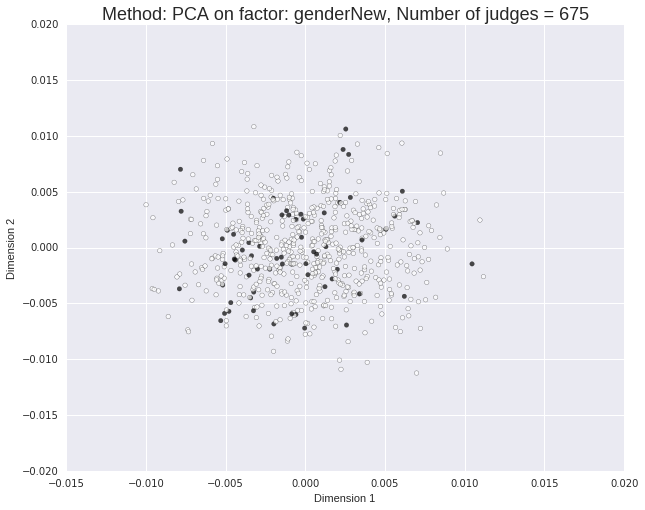

In [216]:

pca_plot = get_plot(X_pca, fact_info={"name":"genderNew","type":str}, method='PCA on factor: '+"genderNew", factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
pca_plot.savefig("output_"+"pca_"+"genderNew"+"_"+str(X_pca.shape[1])+"d.png")

In [217]:
!ls

100CASELEVEL_Touse.dta		    judge_embeddings
auburn_appct_stata.dta		    output_pca_genderNew_2d.png
auburn_district_w_songer_codes.dta  process_data.ipynb
case_by_judge.csv		    testing-vectors.ipynb
case_by_judge_imp_feats.csv	    Untitled.ipynb
caselevel_touse.dta		    V3CircuitJudgesBIO.dta
docvec_index_id.txt		    V3DistrictJudgesBIO.dta
docvecs_0.txt			    vectors2.log
docvecs_1.txt			    vectors2.py
docvecs_2.txt			    vectors3.py
docvecs.p			    vectors.log
get-judge-name-id-map.ipynb	    vectors.py
id_case_map.csv


In [224]:
def run_unsup(X, fact_info, factor_dict, docvec_id_index_dict, n_components=2, gamma=1.0, kernel='sigmoid'):

    factor = fact_info['name']
    ##PCA
    pca = decomposition.PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    pca_plot = get_plot(X_pca, fact_info=fact_info, method='PCA on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    pca_plot.savefig("output_"+"pca_"+factor+"_"+str(X.shape[1])+"d.png")
    
    ##Kernel PCA
    kpca = decomposition.KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma)
    X_kpca = kpca.fit_transform(X)
    kpca_plot = get_plot(X_kpca, fact_info=fact_info, method='Kernel PCA on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    kpca_plot.savefig("output_"+"kpca_"+factor+"_"+str(X.shape[1])+"d.png")
    
    ##Factor Analysis
    fa = decomposition.FactorAnalysis(n_components=n_components)
    X_fa = fa.fit_transform(X)
    fa_plot = get_plot(X_fa, fact_info=fact_info, method='Factor Analysis on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    fa_plot.savefig("output_"+"fa_"+factor+"_"+str(X.shape[1])+"d.png")
    
    ##t-SNE - without PCA
    tsne = manifold.TSNE(n_components=n_components)
    X_tsne = tsne.fit_transform(X)
    tsne_plot = get_plot(X_tsne, fact_info=fact_info, method='t-SNE on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    tsne_plot.savefig("output_"+"tsne_"+factor+"_"+str(X.shape[1])+"d.png")
    
    ##t-SNE - with PCA
    X_pca2 = decomposition.PCA(n_components=50).fit_transform(X)
    X_tsne2 = tsne.fit_transform(X_pca2)
    tsne_pca_plot = get_plot(X_tsne2, fact_info=fact_info, method='t-SNE with PCA (50 dim.) on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)
    tsne_pca_plot.savefig("output_"+"tsne_pca_"+factor+"_"+str(X.shape[1])+"d.png")

### Dimensionality reduction tests

### 1. Party

In [220]:
factor_list = [y for y in map(lambda x: (x,get_factor(final_judges,x,'party',int)), docvec_judges) if y[1] is not None]
factor_dict = dict(factor_list)
print len(factor_dict)

647


#### Simple PCA

In [156]:
pca = decomposition.PCA(n_components=2)

In [147]:
pca.fit(X2)

PCA(copy=True, n_components=2, whiten=False)

In [148]:
X_pca = pca.transform(X2)

In [149]:
X_pca.shape

(675, 2)

In [150]:
pca.explained_variance_ratio_

array([ 0.01819629,  0.01787888], dtype=float32)

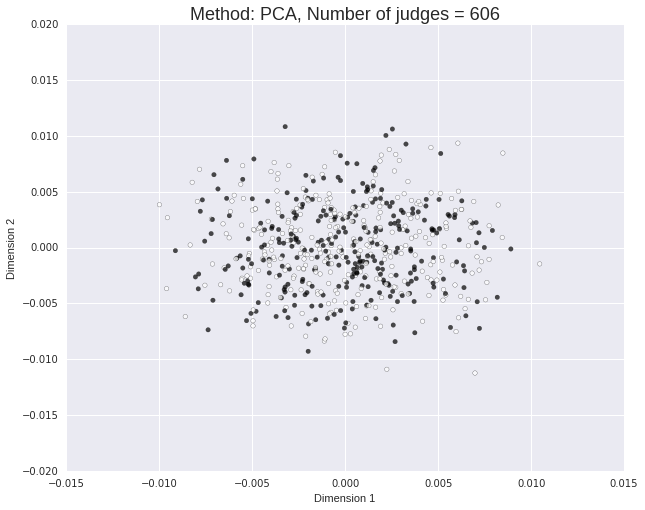

In [162]:
get_plot(X_pca, 'PCA')

#### Kernel PCA

In [57]:
kpca = decomposition.KernelPCA(n_components=2, kernel='sigmoid', gamma=1.0)

In [58]:
kpca.fit(X2)

KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=1.0, kernel='sigmoid',
     kernel_params=None, max_iter=None, n_components=2,
     remove_zero_eig=False, tol=0)

In [59]:
X_kpca = kpca.transform(X2)

In [60]:
X_kpca.shape

(675, 2)

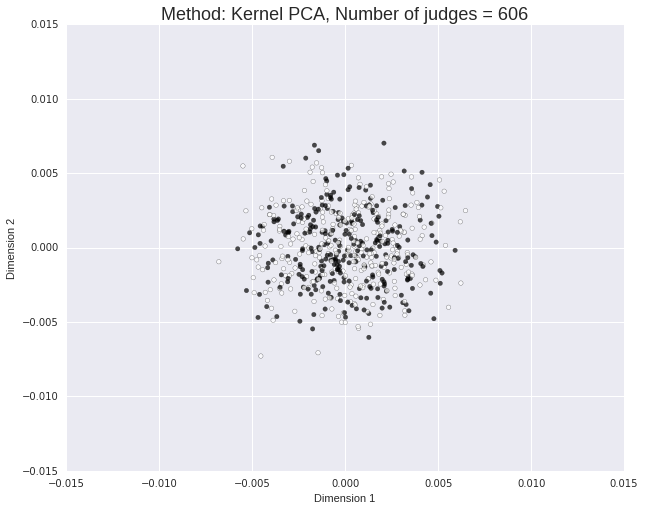

In [113]:
get_plot(X_kpca, 'Kernel PCA')

#### Factor Analysis

In [157]:
fa = decomposition.FactorAnalysis(n_components=2)

In [158]:
X_fa = fa.fit_transform(X2)

In [159]:
print X_fa.shape

(675, 2)


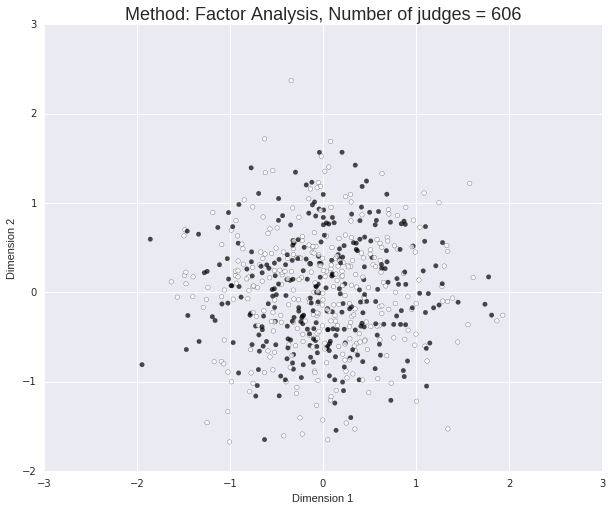

In [160]:
get_plot(X_fa, 'Factor Analysis')

#### t-SNE

##### Without PCA

In [142]:
tsne = manifold.TSNE(n_components=2)

In [143]:
X_tsne = tsne.fit_transform(X2)

In [144]:
X_tsne.shape

(675, 2)

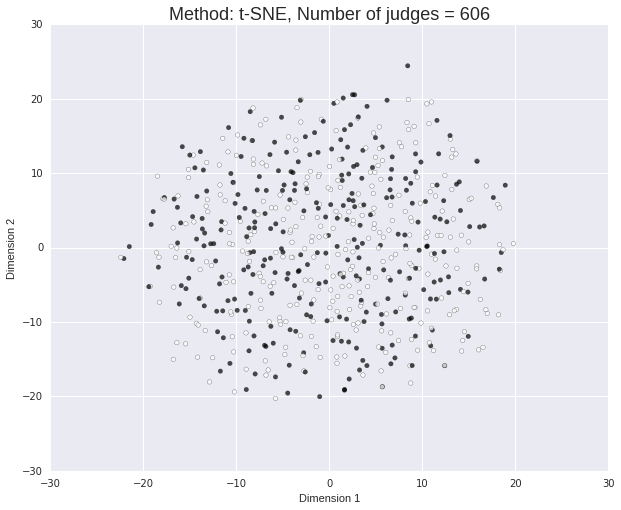

In [145]:
get_plot(X_tsne, 't-SNE')

##### With PCA

In [136]:
X_pca = decomposition.PCA(n_components=50).fit_transform(X2)

In [137]:
X_pca.shape

(675, 50)

In [138]:
tsne = manifold.TSNE(n_components=2)

In [139]:
X_tsne = tsne.fit_transform(X_pca)

In [140]:
X_tsne.shape

(675, 2)

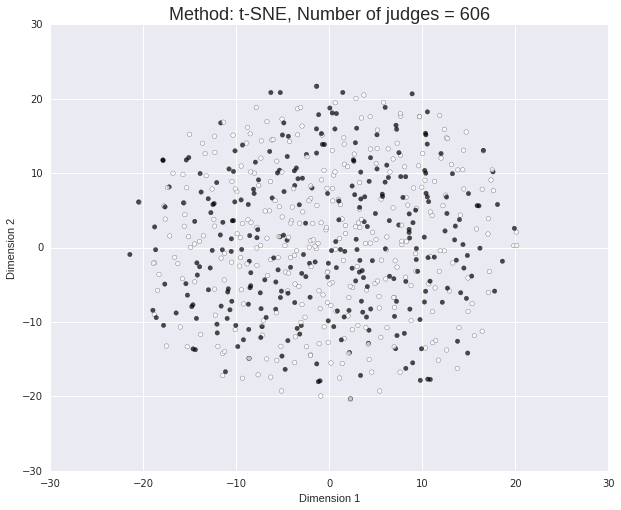

In [141]:
get_plot(X_tsne, 't-SNE')

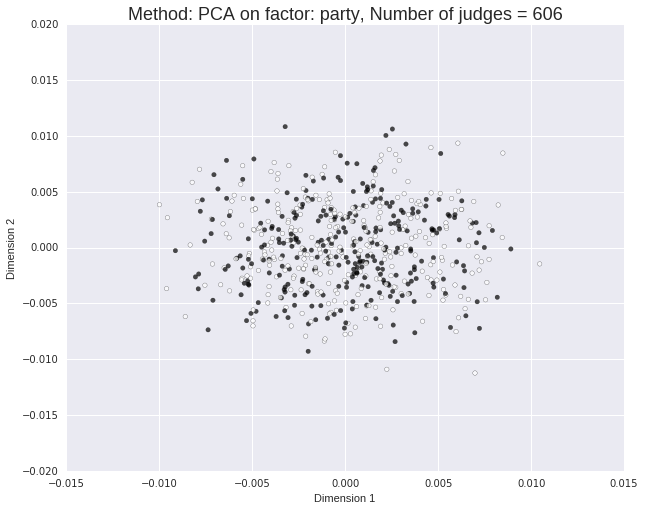

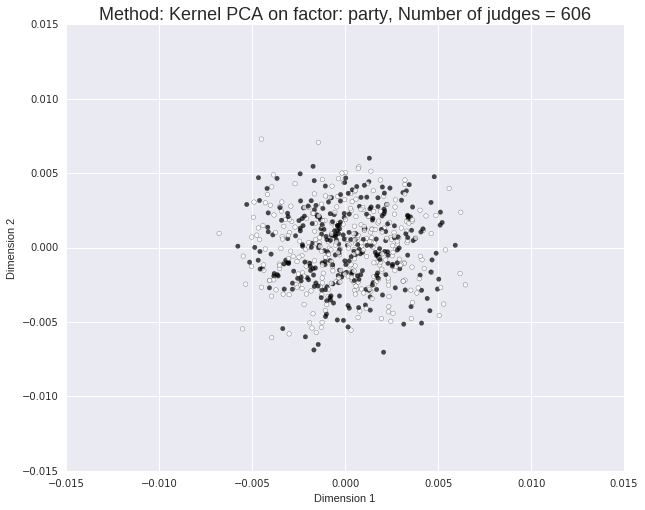

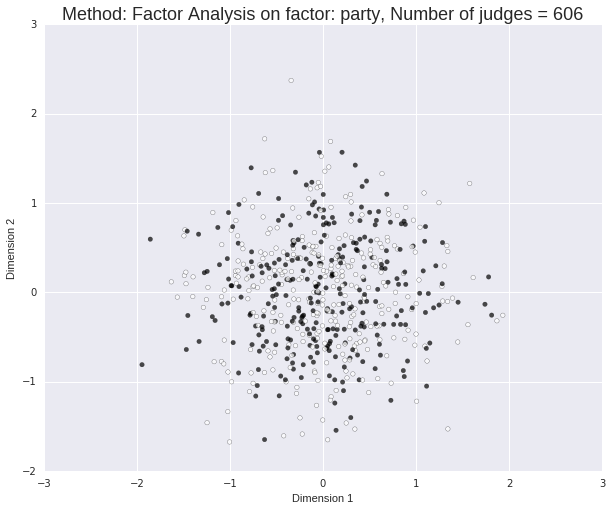

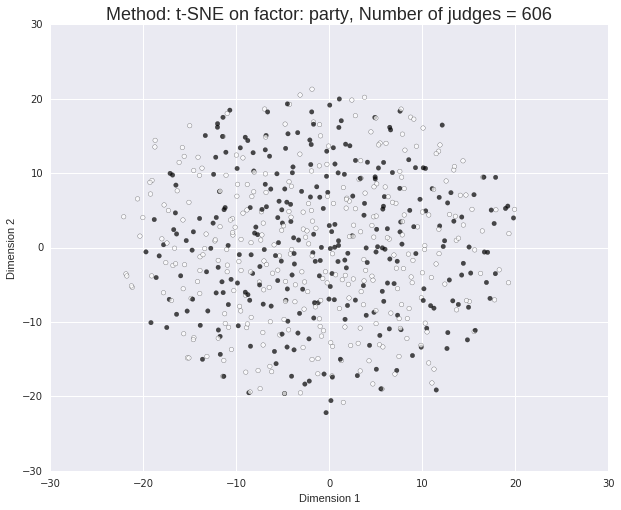

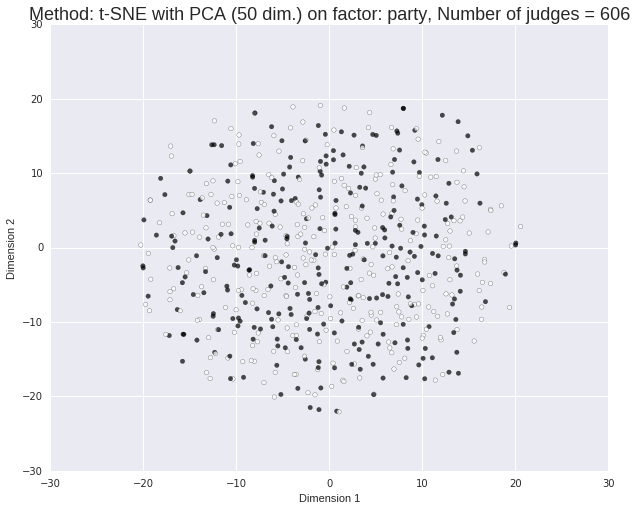

In [225]:
run_unsup(X=X2, fact_info={'name':'party','type':int}, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)

### 2. Gender

In [171]:
final_judges.head()

judgeidentificationnumber  birthyear raceorethnicity  party genderNew  \
0                       1705       1943           White      1         F   
1                       2587       1944           White      0         M   
2                       2208       1932           White      1         F   
3                       1112       1931           White      1         M   
4                       2128       1940           White      0         M   

                           nameofschool2  
0   University of Virginia School of Law  
1   University of Virginia School of Law  
2  University of Pennsylvania Law School  
3                    Stanford Law School  
4      University of Michigan Law School

In [184]:
get_factor(final_judges, 1705, 'genderNew', str)

'F'

In [226]:
g_factor_list = [y for y in map(lambda x: (x,get_factor(final_judges,x,'genderNew',str)), docvec_judges) if y[1] is not None]
g_factor_dict = dict(g_factor_list)
print len(g_factor_dict)

675


In [ ]:
pca = decomposition.PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
get_plot(X_pca, method='PCA on factor: '+factor, factor_dict=factor_dict, docvec_id_index_dict=docvec_id_index_dict)


In [ ]:
#get_colors_and_slice({'name':'genderNew','type':str},factor_dict,docvec_id_index_dict)

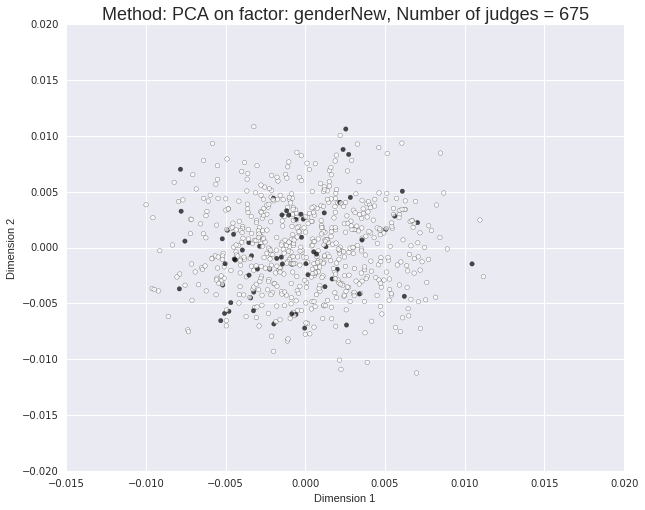

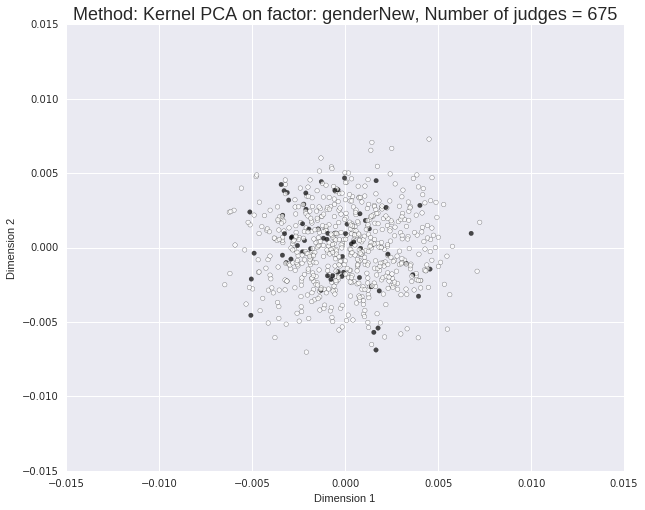

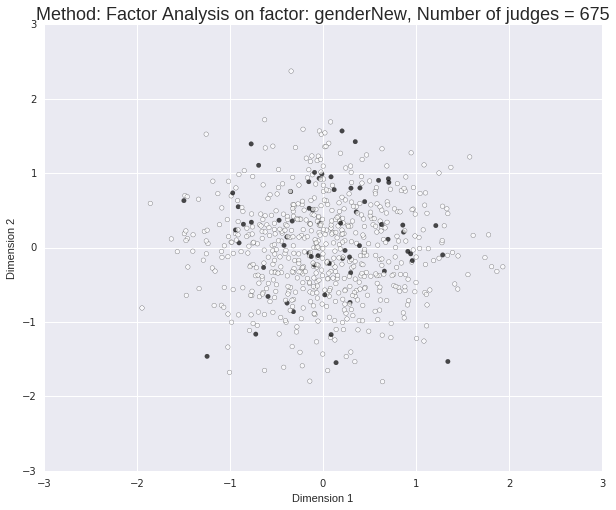

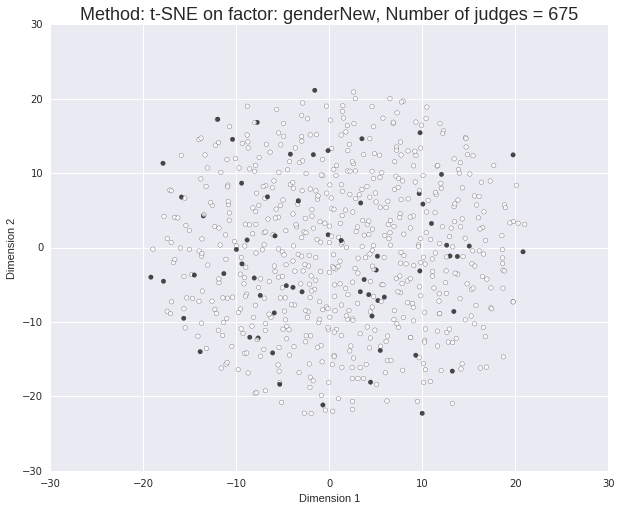

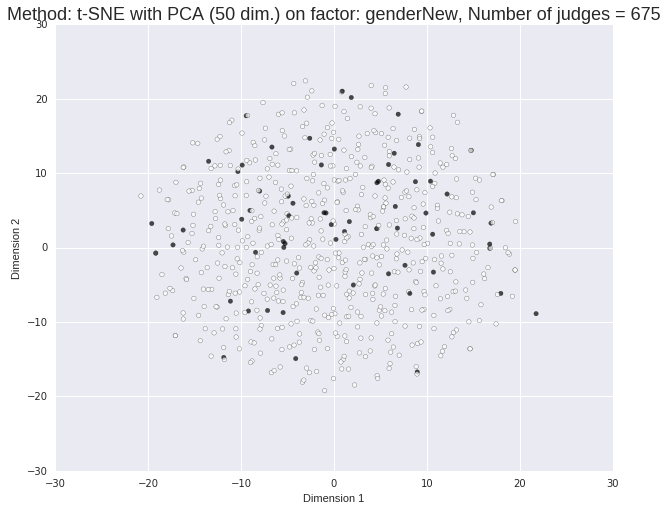

In [228]:
run_unsup(X=X2, fact_info={'name':'genderNew','type':str}, factor_dict=g_factor_dict, docvec_id_index_dict=docvec_id_index_dict)

### Plotting the dimensions

In [97]:
X_new

array([[  1.52578810e-03,   6.91187242e-03],
       [  3.88920167e-03,  -2.57818727e-03],
       [  3.86938755e-03,   3.93286860e-03],
       ..., 
       [  2.99738371e-03,   1.26350133e-05],
       [  1.02740002e-03,   1.23112998e-03],
       [ -1.85587024e-03,  -2.26780772e-03]], dtype=float32)

In [98]:
X_new[:,1].shape

(675,)

In [99]:
colors = np.random.rand(675)

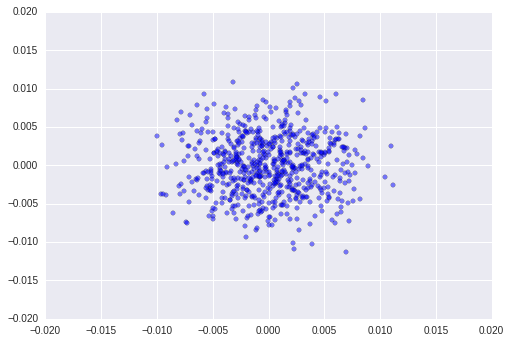

In [100]:
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.5)

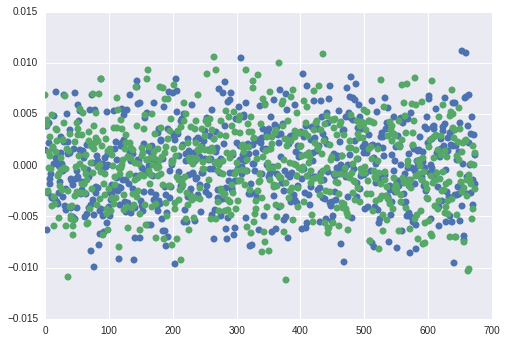

In [52]:
plt.plot(X_new, 'o')